In [165]:
#引入模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
from math import sqrt

In [166]:
#讀檔
test_x = pd.read_csv('df1_test1.csv')
test_y = pd.read_csv('df1_test1y.csv')
train = pd.read_csv('df1_train.csv')

In [167]:
#將訓練資料切分
train_y = pd.DataFrame(train['life_post_consumer'])
train_x = train.drop('life_post_consumer',axis =1)

In [168]:
ymean = np.mean(train_y) #計算訓練集的ymean
standardized_all_train_x = (train_x - np.mean(train_x,axis = 0))/np.std(train_x) #對 train data所有feature做標準化（連續和二元都有）
standardized_all_test_x = (test_x - np.mean(train_x,axis = 0))/np.std(train_x) #對 test data所有feature做標準化（連續和二元都有）
demeaned_y_train = train_y - ymean # 對訓練集的 y做de-mean處理
demeaned_y_test = test_y - ymean # 對測試集的 y做de-mean處理

In [169]:
#只對連續變數做標準化
standardized_cont_train_x = pd.DataFrame()
standardized_cont_test_x = pd.DataFrame()

for i in train_x.columns:
    mean = np.mean(train_x[i])
    std = np.std(train_x[i])
    if  mean > 1: #因 binary的平均不可能高過 1，故用平均值作為篩選是否進行標準化條件
        standardized_cont_train_x[i] = (train_x[i] - mean)/std
        standardized_cont_test_x[i] = (test_x[i]-mean)/std #減去 train_x 的平均值
    else:
        standardized_cont_train_x[i] = train_x[i]
        standardized_cont_test_x[i] = test_x[i]   

In [170]:
lr = LinearRegression() #呼叫 OLS 
def RMSE(ypred,y_test): #計算RMSE
    rmse = sqrt(sum((ypred - y_test)**2)/len(ypred))
    return rmse

**Q1.Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.**

可以發現此資料集中的連續變數只有8組，包含預測值y在內，其他變數皆為二元變數

In [171]:
# 對資料集做敘述統計
train.describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


多數粉絲專頁按讚人數落在130000多人上，使得分布形成左偏形狀，但其他的連續變數都是右偏分佈，顯示出按讚紛絲專頁的人數多，但會關注其貼文的人較少

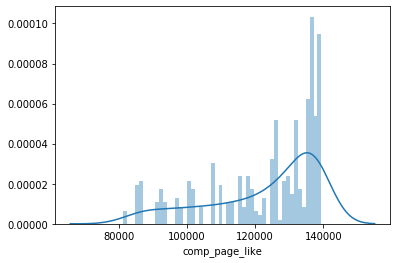

In [221]:
sns.distplot(train['comp_page_like'],50)

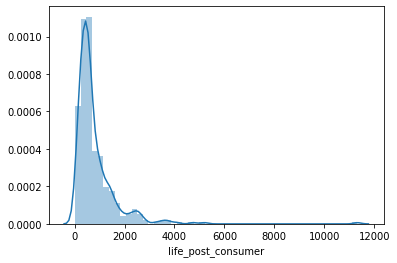

In [230]:
sns.distplot(train['life_post_consumer'],50)

「留言數」、「只按過一個讚」分佈更密集集中在0附近，形成偏峰十分向左的右偏分佈，如下兩張圖

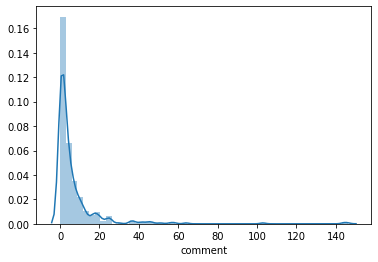

In [224]:
sns.distplot(train['comment'],50)

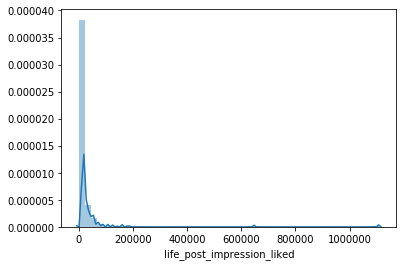

In [227]:
sns.distplot(train['life_post_impression_liked'],50)

「觸及人數」、按讚數、分享數也都是偏峰向左的分佈，但較不密集在0上

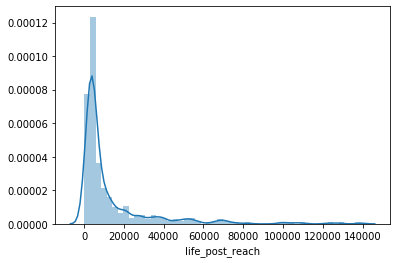

In [228]:
sns.distplot(train['life_post_reach'],50)

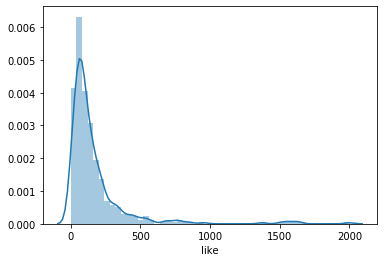

In [229]:
sns.distplot(train['like'],50)

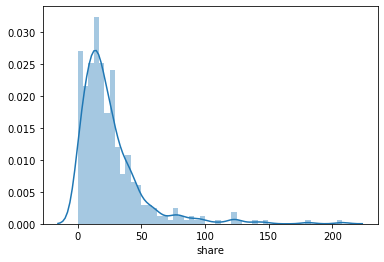

In [235]:
sns.distplot(train['share'],50)

**Q2.Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?**

In [242]:
#為記錄每個case的表現並製圖，先做出標記
Case = ['Case1','Case2A','Case2B','Case2C','Case3A','Case3B','Case3C','Case3D','Case4' ]
Best_RMSE =[ ] #存下每個case中最好的rmse
#純粹用ymean進行預測
mse = 0
y_mean= [ ]
for i in range(50):
    mse += (ymean - test_y.iloc[i][0])**2
    y_mean.append(ymean[0])
mse = mse/50    
rmse = sqrt(mse)
y_mean = np.array(y_mean)
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_1 = pd.DataFrame(y_mean,columns=['Prediction'])
outcome_1['True Value'] = test_y['life_post_consumer']
outcome_1[:20]

RMSE: 928.809510933216


,Prediction,True Value
0,810.34,1183
1,810.34,189
2,810.34,2327
3,810.34,76
4,810.34,354
5,810.34,713
6,810.34,204
7,810.34,288
8,810.34,555
9,810.34,586


**Q3.Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

In [178]:
#用 OLS 預測 2A的情況
lr.fit(train_x,train_y)
A_2 = lr.predict(test_x)
rmse = RMSE(A_2,np.array(test_y))
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_2A = pd.DataFrame(A_2,columns=['Prediction'])
outcome_2A['True Value'] = test_y['life_post_consumer']
outcome_2A[:20]

RMSE: 692.2891271362009


,Prediction,True Value
0,781.579915,1183
1,315.920431,189
2,2279.084852,2327
3,-136.342864,76
4,302.356241,354
5,462.424024,713
6,321.677708,204
7,504.522448,288
8,505.895471,555
9,488.367006,586


**Q4.Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

In [189]:
#用 OLS 預測 2B的情況
lr.fit(train_x,demeaned_y_train)
B_2 = lr.predict(test_x)
rmse = RMSE(B_2,np.array(demeaned_y_test))
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_2B = pd.DataFrame(B_2,columns=['Prediction'])
outcome_2B['Prediction'] = outcome_2B['Prediction']+ ymean[0]
outcome_2B['True Value'] = test_y['life_post_consumer']
outcome_2B[:20]

RMSE: 692.289127136183


,Prediction,True Value
0,781.579915,1183
1,315.920431,189
2,2279.084852,2327
3,-136.342864,76
4,302.356241,354
5,462.424024,713
6,321.677708,204
7,504.522448,288
8,505.895471,555
9,488.367006,586


**Q5.Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

In [191]:
#用 OLS 預測 2C的情況
lr.fit(standardized_all_train_x,demeaned_y_train)
C_2 = lr.predict(standardized_all_test_x)
rmse = RMSE(C_2,np.array(demeaned_y_test))
Best_RMSE.append(rmse)
print('RMSE:',rmse)
outcome_2C = pd.DataFrame(C_2,columns=['Prediction'])
outcome_2C['Prediction'] = outcome_2C['Prediction']+ ymean[0]
outcome_2C['True Value'] = test_y['life_post_consumer']
outcome_2C[:20]

RMSE: 692.2891271371996


,Prediction,True Value
0,781.579915,1183
1,315.920431,189
2,2279.084852,2327
3,-136.342864,76
4,302.356241,354
5,462.424024,713
6,321.677708,204
7,504.522448,288
8,505.895471,555
9,488.367006,586


Case 2 的結果竟然全部都相同。考慮線性模型的特徵，對於測試和訓練集的前處理，不論是對x進行標準化與否；或是對y執行de-mean，都不會影響模型的預測效果。

**Q6.Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient (𝛼): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to 𝛼. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best 𝛼?**

Best Alpha: 10.0
Best RMSE: 660.5612900111672


,Prediction,True Value
0,1068.333624,1183
1,229.755319,189
2,2008.558892,2327
3,-102.874899,76
4,541.457699,354
5,606.459258,713
6,414.982798,204
7,602.810514,288
8,500.184385,555
9,492.306636,586


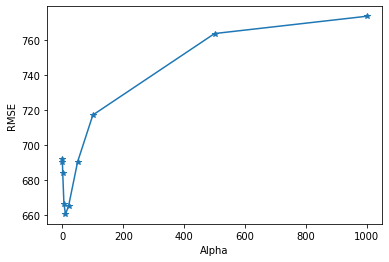

In [213]:
def ridge(x_train,y_train,x_test,y_test): #呼叫 Ridge並執行多個 alpha值
    alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    fig,ax = plt.subplots() 
    Rmse =[ ]
    #計算每一個 alpha下的預測效果
    for i in alpha: 
        rr = Ridge(alpha = i) 
        rr.fit(x_train, y_train) 
        ypred = rr.predict(x_test)
        rmse = RMSE(ypred,np.array(y_test))
        Rmse.append(rmse) # 存下每一筆 rmse
    index = [ i == min(Rmse) for i in Rmse] #找出rmse的最低值，做為模型中最佳的 alpha
    best_a = np.array(alpha)[index]
    print('Best Alpha:',best_a[0])
    print('Best RMSE:',min(Rmse))
    Best_RMSE.append(min(Rmse))
    ax.plot(alpha,Rmse,'*-')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('RMSE')
    #取出最佳值輸出
    best_rr = Ridge(alpha = best_a)
    best_rr.fit(x_train,y_train)
    best_pred = best_rr.predict(x_test)
    outcome = pd.DataFrame(best_pred,columns=['Prediction'])
    if int(y_train.iloc[0][0]) == -287: #如果數據是demean_y，記得加回平均
        outcome['Prediction'] = outcome['Prediction']+ ymean[0]
    outcome['True Value'] = test_y['life_post_consumer']
    return outcome[:20]
ridge(train_x,train_y,test_x,test_y)

**Q7.Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient (𝛼): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to 𝛼. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best 𝛼?**

In [246]:
standardized_cont_train_x

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,0.167369,0,-0.522485,-0.211290,-0.587894,-0.476554,-0.440910,-0.597558,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.787796,0,-0.473877,-0.189856,-0.530975,0.635754,-0.214428,0.174232,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.868978,1,-0.591308,-0.231953,-0.720178,-0.476554,-0.696218,-0.983453,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.922669,1,1.171820,0.069974,0.565771,0.913831,0.996225,1.872169,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.658274,0,-0.569183,-0.226095,-0.678675,-0.337516,-0.432674,-0.713327,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.921516,0,-0.442843,-0.194821,-0.490657,-0.407035,-0.436792,0.019874,0,0,...,0,0,0,0,0,1,0,0,0,0
396,0.199903,0,0.365125,0.034220,0.931529,6.683928,1.235061,0.290000,0,0,...,0,0,0,0,0,0,0,1,0,0
397,0.217308,0,0.239030,0.122712,1.098070,2.026139,-0.292667,-0.443200,0,1,...,0,0,0,0,0,0,0,0,1,0
398,0.412637,1,1.316712,0.155817,1.088583,-0.198477,-0.267960,-0.597558,0,0,...,0,0,0,0,0,0,0,0,1,0


Best Alpha: 20.0
Best RMSE: 645.5168123938738


,Prediction,True Value
0,1142.269542,1183
1,254.157015,189
2,1834.024889,2327
3,15.718169,76
4,599.763663,354
5,635.940390,713
6,427.856444,204
7,603.662060,288
8,514.523788,555
9,580.001060,586


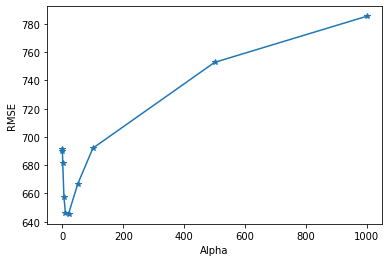

In [214]:
ridge(standardized_cont_train_x,demeaned_y_train,standardized_cont_test_x,demeaned_y_test)

**Q8.Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient (𝛼): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to 𝛼. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best 𝛼?**

Best Alpha: 10.0
Best RMSE: 660.5612900111671


,Prediction,True Value
0,1068.333624,1183
1,229.755319,189
2,2008.558892,2327
3,-102.874899,76
4,541.457699,354
5,606.459258,713
6,414.982798,204
7,602.810514,288
8,500.184385,555
9,492.306636,586


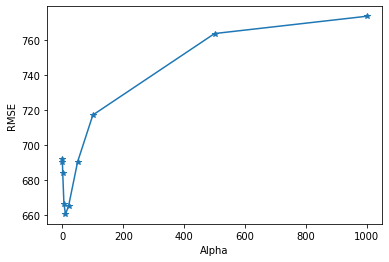

In [215]:
ridge(train_x,demeaned_y_train,test_x,demeaned_y_test)

**Q9.Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient (𝛼): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to 𝛼. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best 𝛼?**

Best Alpha: 100.0
Best RMSE: 588.793465752767


,Prediction,True Value
0,1040.500123,1183
1,278.465050,189
2,1997.724464,2327
3,-21.140365,76
4,554.215257,354
5,602.840642,713
6,337.523470,204
7,599.435785,288
8,470.293704,555
9,500.724140,586


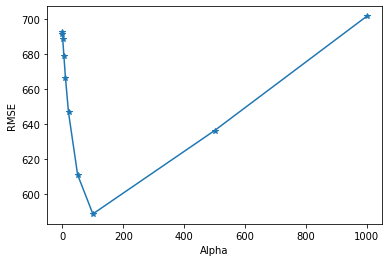

In [216]:
ridge(standardized_all_train_x,demeaned_y_train,standardized_all_test_x,demeaned_y_test)

發現在Case3中，A和C的預測值相同，判斷對y進行De-mean處理在模型中是沒有幫助的；而其中Rmse最低的是D，模型竟然在對二元變數做標準化之後的預測能力上升，但alpha值來到100，比起其他情況高出許多

**Q10.Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient (𝛼): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to 𝛼. What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best 𝛼?**

Best Alpha: 10.0
Best RMSE: 643.3838482161635


/Users/chenjingmin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47975917.14864497, tolerance: 32249.892376
  positive)
/Users/chenjingmin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456630.675997615, tolerance: 32249.892376
  positive)


,Prediction,True Value
0,1241.598585,1183
1,287.888761,189
2,2119.906747,2327
3,-16.297183,76
4,449.101151,354
5,711.145591,713
6,398.059174,204
7,460.151242,288
8,645.442998,555
9,591.436454,586


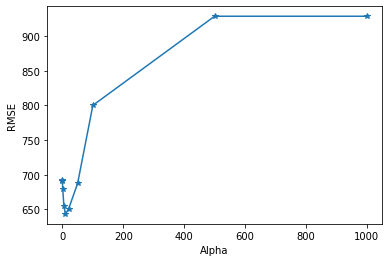

In [219]:
def lasso(x_train,y_train,x_test,y_test): #呼叫 Lasso並執行多個 alpha值
    alpha = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    fig,ax = plt.subplots()
    Rmse =[ ]
    for i in alpha:
        lasso_pred =[ ]
        ls = Lasso(alpha = i) 
        ls.fit(x_train, y_train) 
        ypred = ls.predict(x_test) #輸出會是一維的列表
        for i in ypred: #將預測值變成陣列形式
            lasso_pred.append([i])
        rmse = RMSE(np.array(lasso_pred),np.array(y_test))
        Rmse.append(rmse)
    index = [ i == min(Rmse) for i in Rmse]
    best_a = np.array(alpha)[index]
    print('Best Alpha:',best_a[0])
    print('Best RMSE:',min(Rmse))
    Best_RMSE.append(min(Rmse))
    ax.plot(alpha,Rmse,'*-')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('RMSE')
    
    best =[ ]
    best_ls = Lasso(alpha = best_a)
    best_ls.fit(x_train,y_train)
    best_pred = best_ls.predict(x_test)
    outcome = pd.DataFrame(best_pred,columns=['Prediction'])
    outcome['Prediction'] = outcome['Prediction']+ ymean[0]
    outcome['True Value'] = test_y['life_post_consumer']
    return outcome[:20]
lasso(standardized_cont_train_x,demeaned_y_train,standardized_cont_test_x,demeaned_y_test)

Case 4與3B的預測能力相去不遠，但在alpha很大的時候（大於100之後），預測能力大幅衰減

**Q11.Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?**

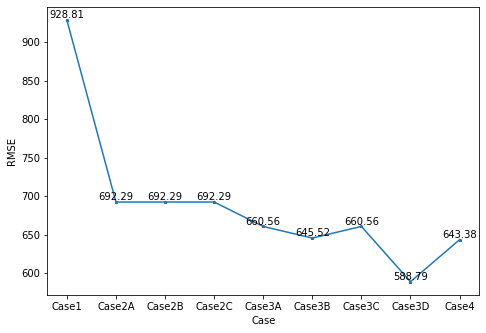

In [220]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.plot(Case,Best_RMSE,'*-',markersize = 3)
plt.ylabel('RMSE')
plt.xlabel('Case')
for a, b in zip(Case, Best_RMSE):
    plt.text(a, b, '%.2f'%b, ha='center', va='bottom', fontsize=10)


結論：發現在所有線性模型之中，對Y做De-mean是毫無意義的。然而同時也可以觀察出，在所有Case中的前處理，預測能力最好的是Case3D，但其同時也是懲罰項最大的前處理法。判斷是因為對二元變數做標準化，會減少變數之間的距離，在預測上的效果改進些許。所以在前處理之中，我們也許該對所有的變數（不論是否為連續變數）先做標準化處理，可以得到較好用的預測模型。